<a href="https://colab.research.google.com/github/sidchaubey/ml_algo-from-Scratch/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Quandl


In [2]:
import pandas as pd
import quandl
quandl.ApiConfig.api_key = 'g8x5jz6txr_PLTFfF_'# Changed api
df = quandl.get("WIKI/GOOGL")
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [3]:
df.shape

(3424, 12)

In [4]:
df.isna().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

In [5]:
df["Volume"].value_counts()

3865500.0     2
3480500.0     2
7827300.0     2
3348800.0     2
4229700.0     2
             ..
18782900.0    1
16076100.0    1
35468200.0    1
4630100.0     1
4096000.0     1
Name: Volume, Length: 3396, dtype: int64

In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [7]:
df.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03,3424.000000,3424.0,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03
mean,596.602610,602.045438,590.571710,596.352862,7.818568e+06,0.165880,1.0,409.221461,412.786556,405.227809,409.057885,7.818568e+06
std,226.989782,227.783310,225.846581,226.896692,8.248211e+06,9.706436,0.0,257.844081,259.366718,255.981628,257.773495,8.248211e+06
min,99.090000,101.740000,95.960000,100.010000,5.211410e+05,0.000000,1.0,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,461.157500,465.392500,456.065000,461.205000,2.430647e+06,0.000000,1.0,231.292728,233.416785,228.738594,231.316552,2.430647e+06
50%,565.120000,569.599950,559.860000,564.940000,5.076200e+06,0.000000,1.0,300.174109,302.496277,297.909618,300.264387,5.076200e+06
75%,735.627500,740.850000,728.680025,733.262500,1.020910e+07,0.000000,1.0,561.178118,565.000000,556.673036,561.200000,1.020910e+07
max,1226.800000,1228.880000,1218.600000,1220.170000,8.215110e+07,567.971668,1.0,1188.000000,1198.000000,1184.060000,1187.560000,8.215110e+07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3424 entries, 2004-08-19 to 2018-03-27
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         3424 non-null   float64
 1   High         3424 non-null   float64
 2   Low          3424 non-null   float64
 3   Close        3424 non-null   float64
 4   Volume       3424 non-null   float64
 5   Ex-Dividend  3424 non-null   float64
 6   Split Ratio  3424 non-null   float64
 7   Adj. Open    3424 non-null   float64
 8   Adj. High    3424 non-null   float64
 9   Adj. Low     3424 non-null   float64
 10  Adj. Close   3424 non-null   float64
 11  Adj. Volume  3424 non-null   float64
dtypes: float64(12)
memory usage: 347.8 KB


##### As all the columns are of float data type we can easily run regression model


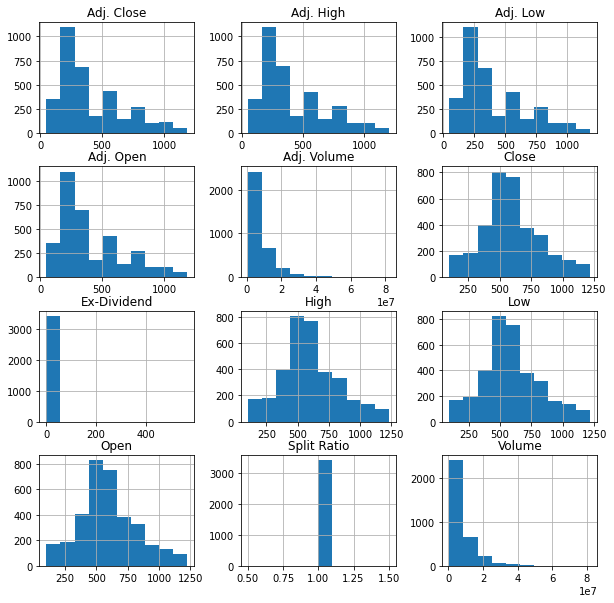

In [9]:
df.hist(figsize=(10,10));

In [0]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [11]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [0]:
df["HL_PCT"] = (df["Adj. High"]-df["Adj. Close"])/df["Adj. Close"]*100.0
df["PCT_change"] = (df["Adj. Close"]-df["Adj. High"])/df["Adj. Open"]*100.0


In [13]:
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563,-3.724628
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922,-0.762301
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433,-3.683640
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469,-6.049982
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792,-1.909126
...,...,...,...,...,...,...,...
2018-03-21,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0,1.343693,-1.345452
2018-03-22,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0,2.921711,-2.849048
2018-03-23,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0,3.918952,-3.826436


In [0]:
df_new = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

In [15]:
df_new.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,-3.724628,44659000.0
2004-08-20,54.322689,0.710922,-0.762301,22834300.0
2004-08-23,54.869377,3.729433,-3.683640,18256100.0
2004-08-24,52.597363,6.417469,-6.049982,15247300.0
2004-08-25,53.164113,1.886792,-1.909126,9188600.0


In [0]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)


In [17]:
import math
forecast_out = int(math.ceil(0.01*len(df)))
df_new['label'] = df_new[forecast_col].shift(-forecast_out)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
df_new

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,-3.724628,44659000.0,69.078238
2004-08-20,54.322689,0.710922,-0.762301,22834300.0,67.839414
2004-08-23,54.869377,3.729433,-3.683640,18256100.0,68.912727
2004-08-24,52.597363,6.417469,-6.049982,15247300.0,70.668146
2004-08-25,53.164113,1.886792,-1.909126,9188600.0,71.219849
...,...,...,...,...,...
2018-03-21,1094.000000,1.343693,-1.345452,1990515.0,NaN
2018-03-22,1053.150000,2.921711,-2.849048,3418154.0,NaN
2018-03-23,1026.550000,3.918952,-3.826436,2413517.0,NaN


In [19]:
df_new.tail(90)

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2017-11-15,1036.41,0.310688,-0.311111,900695.0,1114.21
2017-11-16,1048.47,0.313791,-0.316727,1125995.0,1112.79
2017-11-17,1035.89,1.458649,-1.439322,1286044.0,1110.14
2017-11-20,1034.66,0.390466,-0.389961,850423.0,1111.88
2017-11-21,1050.30,0.008569,-0.008654,1075568.0,1130.65
...,...,...,...,...,...
2018-03-21,1094.00,1.343693,-1.345452,1990515.0,NaN
2018-03-22,1053.15,2.921711,-2.849048,3418154.0,NaN
2018-03-23,1026.55,3.918952,-3.826436,2413517.0,NaN


In [20]:
df_new.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_new.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-01-30,1177.37,0.896914,-0.896648,1792602.0,1094.00
2018-01-31,1182.22,0.346805,-0.346339,1643877.0,1053.15
2018-02-01,1181.59,0.495942,-0.498304,2774967.0,1026.55
2018-02-02,1119.20,1.081129,-1.073247,5798880.0,1054.09
2018-02-05,1068.76,4.325574,-4.200398,3742469.0,1006.94


In [22]:
!pip install sklearn
import numpy as np
from sklearn import preprocessing,model_selection, svm 
from sklearn.linear_model import LinearRegression

In [23]:
X = np.array(df_new.drop(["label"],axis=1))# Features
y = np.array(df_new["label"])# label

X = preprocessing.scale(X)
X

array([[-1.41006544,  2.35025798, -2.45950518,  4.44790502],
       [-1.39402696, -0.30866295,  0.26166508,  1.80881376],
       [-1.39183486,  2.36520212, -2.42185463,  1.25520764],
       ...,
       [ 3.12606095, -0.49909747,  0.50417085, -0.61680539],
       [ 2.87589111,  0.01927479, -0.0239676 , -0.25114711],
       [ 2.67363808,  2.89327664, -2.89654418, -0.4998129 ]])

In [24]:
# X = X[:-forecast_out+1]
df_new.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
y = np.array(df_new["label"])

In [26]:
len(X)

3389

In [27]:
len(y)

3389

In [0]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,
                                                                 test_size=0.3,
                                                                random_state=1)

In [0]:
clf = LinearRegression()
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)

In [30]:
print(accuracy)

0.9764698866171294


In [31]:
clf = LinearRegression(n_jobs=10)# n_jpbs how many runs we're going to dp
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9764698866171294


In [32]:
# Support Vector Regressor
clf = svm.SVR()
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.7915581406167476


In [33]:
clf = svm.SVR(kernel="poly")
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6184140918015137


## Working on  Unknown Data

```
# This is formatted as code
```



In [0]:
import pickle

In [0]:

with open("linearregression.pickle","wb") as f:
  pickle.dump(clf,f)

pickle_in = open("linearregression.pickle","rb")
clf = pickle.load(pickle_in)

# To find best fit line

Equation of Line is:
y = mx+b
Where m = slope of line & b= y-intercept

m(slope)= ((mean(x) * mean(y))-mean(x * y))/
          ((mean(x) ** 2)-(mean(x ** 2)))

b(y-intercept) = mean(y)-(m*mean(x))

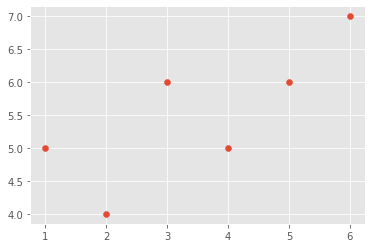

0.42857142857142866 4.0


In [36]:
# Implementing Simple Linear regression From scratch
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")
x = np.array([1,2,3,4,5,6],dtype=np.float64)
y = np.array([5,4,6,5,6,7],dtype=np.float64)
plt.scatter(x,y)
plt.show();

def best_fit_slope_and_intercept(x,y):
  m = (mean(x)*mean(y)-mean(x*y))/((mean(x)**2)-mean(x**2))

  b = (mean(y) - (m*(mean(x))))
  return m,b

m,b = best_fit_slope_and_intercept(x,y)
print(m,b)

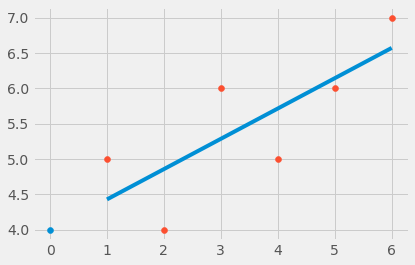

In [37]:
style.use("fivethirtyeight")
regression_line = [(m*x)+b for x in x]
xs = 0# Predicting the value of y if x is 0
ys = m*xs+b
plt.plot(x,regression_line)
plt.scatter(xs,ys)
plt.scatter(x,y)
# plt.xlim(0)
# plt.ylim(0)
plt.show()

# Mean squared Error
r**2 = 1-(se(ycap)/se(ymean)) 

In [0]:
def squared_error(ys_orig,ys_line):
  return sum((ys_line-ys_orig)**2)

def coefficient_of_determination(ys_orig,ys_line):
  y_mean_line = [mean(ys_orig) for y in ys_orig]
  squared_error_regr = squared_error(ys_orig,ys_line)
  squared_error_y_mean = squared_error(ys_orig,y_mean_line)
  return 1-(squared_error_regr/squared_error_y_mean)

In [39]:
r_squared = coefficient_of_determination(y,regression_line)
print(round(r_squared,2))

0.58
